#### imports

In [12]:
#### pandas
import pandas as pd
import numpy as np
from datetime import date
from IPython.display import display, HTML
from sklearn import preprocessing
%config IPCompleter.greedy=True

### Import data from our changed csv

In [13]:
all_hotels = pd.read_csv("Hotels_data_Changed.csv", encoding = "utf8")
display(all_hotels.head())

Unnamed: 0  Snapshot ID Snapshot Date Checkin Date  Days  Original Price  \
0           0            1    2015-07-17   2015-08-12     5            1178   
1           1            1    2015-07-17   2015-08-19     5            1113   
2           2            1    2015-07-17   2015-08-13     5            4370   
3           3            1    2015-07-17   2015-07-26     5            1739   
4           4            1    2015-07-17   2015-08-12     5            1739   

   Discount Price  Discount Code  Available Rooms  \
0            1040              1                6   
1             982              1                8   
2            4240              1                3   
3            1667              1               18   
4            1672              1                3   

                               Hotel Name  Hotel Stars  Day Diff  Week Day  \
0  Best Western Plus Seaport Inn Downtown            3      26.0         2   
1  Best Western Plus Seaport Inn Downtown            3      33.0         2   
2                  The Peninsula New York            5      27.0         3   
3            Eventi Hotel a Kimpton Hotel            4       9.0         6   
4            Eventi Hotel a Kimpton Hotel            4      26.0         2   

   Discount Diff  Discount Perc  
0            138          88.29  
1            131          88.23  
2            130          97.03  
3             72          95.86  
4             67          96.15

### Get dataFrame with less columns

In [14]:
filtered_data = all_hotels.filter(['Hotel Name','Checkin Date','Discount Code','Discount Price'], axis=1)
display(filtered_data.head())

Hotel Name Checkin Date  Discount Code  \
0  Best Western Plus Seaport Inn Downtown   2015-08-12              1   
1  Best Western Plus Seaport Inn Downtown   2015-08-19              1   
2                  The Peninsula New York   2015-08-13              1   
3            Eventi Hotel a Kimpton Hotel   2015-07-26              1   
4            Eventi Hotel a Kimpton Hotel   2015-08-12              1   

   Discount Price  
0            1040  
1             982  
2            4240  
3            1667  
4            1672

### Group by "Hotel Name" and reset the index column to "Orders" (number of the orders)

In [15]:
orders_count = filtered_data.groupby("Hotel Name").size().reset_index(name="Orders")
display(orders_count.head())

Hotel Name  Orders
0                  1 Hotel Central Park     122
1                       36 Hudson Hotel       4
2            6 Columbus - a SIXTY Hotel     137
3  70 Park Avenue Hotel a Kimpton Hotel      43
4                      AKA Central Park       8

## Get top 150 most used hotels 

In [16]:
most_used_hotels = orders_count.sort_values("Orders", ascending=False).head(150)
display(most_used_hotels.head())

most_used_hotels = most_used_hotels[["Hotel Name"]]

Hotel Name  Orders
327      Newark Liberty International Airport Marriott    5346
194                     Hilton Garden Inn Times Square    4892
374  Residence Inn Newark Elizabeth Liberty Interna...    4314
538                    Westin New York at Times Square    3792
290                       Loews Regency New York Hotel    3617

### Merge DataFrames

In [17]:
ordered_most_used_hotels = pd.merge(left = most_used_hotels, right=filtered_data,left_on="Hotel Name", right_on="Hotel Name")
display(ordered_most_used_hotels.head())

Hotel Name Checkin Date  Discount Code  \
0  Newark Liberty International Airport Marriott   2015-07-18              1   
1  Newark Liberty International Airport Marriott   2015-07-22              1   
2  Newark Liberty International Airport Marriott   2015-07-24              1   
3  Newark Liberty International Airport Marriott   2015-07-29              1   
4  Newark Liberty International Airport Marriott   2015-08-12              1   

   Discount Price  
0            1275  
1             873  
2            1325  
3             777  
4             795

## Get top 40 date with most orders

In [18]:
most_visited_dates = ordered_most_used_hotels.groupby("Checkin Date").size().reset_index(name="counts")
date_count = most_visited_dates.sort_values("counts", ascending=False).head(40)
display(date_count)
date_count = date_count[["Checkin Date"]]

Checkin Date  counts
116   2015-11-11    2302
88    2015-10-14    1887
109   2015-11-04    1885
32    2015-08-19    1883
102   2015-10-28    1861
95    2015-10-21    1817
111   2015-11-06    1808
25    2015-08-12    1765
110   2015-11-05    1684
96    2015-10-22    1662
117   2015-11-12    1649
54    2015-09-10    1623
103   2015-10-29    1623
53    2015-09-09    1616
123   2015-11-18    1582
39    2015-08-26    1559
115   2015-11-10    1548
118   2015-11-13    1547
89    2015-10-15    1473
126   2015-11-21    1469
74    2015-09-30    1464
104   2015-10-30    1412
60    2015-09-16    1407
61    2015-09-17    1402
133   2015-11-28    1383
75    2015-10-01    1373
131   2015-11-26    1356
55    2015-09-11    1332
62    2015-09-18    1326
90    2015-10-16    1309
132   2015-11-27    1306
76    2015-10-02    1280
81    2015-10-07    1257
112   2015-11-07    1256
41    2015-08-28    1251
40    2015-08-27    1239
101   2015-10-27    1227
108   2015-11-03    1215
26    2015-08-13    1210
130   2015-11-25    1175

### Min Price for Hotel By Checkin Date

In [19]:
# Create a Date-Hotels DataFrame
new_data_fragment_colums = ['Hotel name']
Nan_arr = []

# Add top 40 Checkin dates with every discount code as columns
for date in most_visited_dates.values:
    # Run on each discount code
    for code in range(1, 5):
        col_name = "{} {}".format(date[0], code)
        new_data_fragment_colums.append(col_name)
        Nan_arr.append(0)

df = pd.DataFrame(columns=new_data_fragment_colums)
row_map = {}

# Add every hotel in the top 150 hotels as a row
for hotel in ordered_most_used_hotels.values:
    # Getting Hotel index
    if hotel[0] in row_map:
        index = row_map[hotel[0]]
    else:
        index = len(df.index)
        
        # Adding Hotels columns
        df.append(Nan_arr)
        df.set_value(index, 'Hotel name', hotel[0])
        row_map[hotel[0]] = index
    # Adding Discount to Dataframe
    col_name = "{} {}".format(hotel[1], hotel[2])
    if col_name not in new_data_fragment_colums:
        continue
    df.set_value(index, col_name, hotel[3])

# Nan value to -1
hotels_with_chekin_and_price = df.fillna(-1)
display(hotels_with_chekin_and_price)

/usr/local/lib/python3.7/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Hotel name  2015-07-18 1  \
0        Newark Liberty International Airport Marriott          1275   
1                       Hilton Garden Inn Times Square            -1   
2    Residence Inn Newark Elizabeth Liberty Interna...            -1   
3                      Westin New York at Times Square            -1   
4                         Loews Regency New York Hotel            -1   
5                                     Viceroy New York            -1   
6                          Four Seasons Hotel New York            -1   
7                  Langham Place New York Fifth Avenue            -1   
8                         The Carlyle A Rosewood Hotel            -1   
9    DoubleTree by Hilton Metropolitan - New York City            -1   
10                    Magnuson Convention Center Hotel            -1   
11         Hilton Garden Inn New York West 35th Street            -1   
12     Hilton Garden Inn New York-Times Square Central            -1   
13                                     Conrad New York            -1   
14                 Wyndham Garden Brooklyn Sunset Park            -1   
15                               Hilton Newark Airport            -1   
16                                Omni Berkshire Place            -1   
17                                 Hilton Times Square            -1   
18                                 Park Hyatt New York            -1   
19   Homewood Suites by Hilton NY Midtown Manhattan...            -1   
20                                Grand Hyatt New York            -1   
21                                     The Plaza Hotel            -1   
22                                Quality Inn Woodside            -1   
23                         Hyatt Union Square New York            -1   
24                         Le Parker Meridien New York            -1   
25                                The New York EDITION            -1   
26                           W New York - Union Square            -1   
27                    Renaissance Newark Airport Hotel            -1   
28   Hampton Inn New York - 35th Street - Empire St...            -1   
29    The Lexington New York City Autograph Collection            -1   
..                                                 ...           ...   
120  Residence Inn New York The Bronx At Metro Cent...            -1   
121             Hyatt Place Flushing LaGuardia Airport            -1   
122                                   San Carlos Hotel            -1   
123                                          The Roger            -1   
124                                 Wyndham New Yorker            -1   
125  Roxy Hotel Tribeca (formerly the Tribeca Grand...            -1   
126                         Courtyard Newark Elizabeth            -1   
127                             The St. Regis New York            -1   
128                   Best Western Bowery Hanbee Hotel            -1   
129                Crowne Plaza Times Square Manhattan            -1   
130                       Hudson New York Central Park            -1   
131           Hampton Inn New York - LaGuardia Airport            -1   
132                           Wyndham Garden Chinatown            -1   
133     Courtyard New York Manhattan Times Square West            -1   
134                                The Kitano New York            -1   
135                                       Aloft Harlem            -1   
136                Super 8 Brooklyn   Park Slope Hotel            -1   
137             Baccarat Hotel and Residences New York            -1   
138                                           The Mark            -1   
139                                        The Out NYC            -1   
140                                        Chelsea Inn            -1   
141  Courtyard by Marriott New York Manhattan   Cen...            -1   
142                        Hilton New York JFK Airport            -1   
143                                   Blakely New York            -1   
144         

In [20]:
result_vals = hotels_with_chekin_and_price.drop('Hotel name', axis=1)

# Max/Min value
max_val = result_vals.values.max()
min_val = max_val

for row in result_vals.values:
    for i in row:
        if i != -1 and i < min_val:
            min_val = i
            
print("min:"+str(min_val))
print("max:"+str(max_val))

max:28675
min:260


In [21]:
# Normalizing the price of the hotels from 0 to 100
def normalize(maxVal, minVal, value):
    if (maxVal != minVal):
        return ((value - minVal) / (maxVal-minVal) * 100)
    else:
        return 100


# Normalizing results
for index, row in result_vals.iterrows():
    hotels_with_chekin_and_price.iloc[index, 1:161] = row.apply(lambda x: -1 if x == -1 else normalize(max_val, min_val, x))
display(hotels_with_chekin_and_price)

Hotel name  2015-07-18 1  \
0        Newark Liberty International Airport Marriott      3.572057   
1                       Hilton Garden Inn Times Square     -1.000000   
2    Residence Inn Newark Elizabeth Liberty Interna...     -1.000000   
3                      Westin New York at Times Square     -1.000000   
4                         Loews Regency New York Hotel     -1.000000   
5                                     Viceroy New York     -1.000000   
6                          Four Seasons Hotel New York     -1.000000   
7                  Langham Place New York Fifth Avenue     -1.000000   
8                         The Carlyle A Rosewood Hotel     -1.000000   
9    DoubleTree by Hilton Metropolitan - New York City     -1.000000   
10                    Magnuson Convention Center Hotel     -1.000000   
11         Hilton Garden Inn New York West 35th Street     -1.000000   
12     Hilton Garden Inn New York-Times Square Central     -1.000000   
13                                     Conrad New York     -1.000000   
14                 Wyndham Garden Brooklyn Sunset Park     -1.000000   
15                               Hilton Newark Airport     -1.000000   
16                                Omni Berkshire Place     -1.000000   
17                                 Hilton Times Square     -1.000000   
18                                 Park Hyatt New York     -1.000000   
19   Homewood Suites by Hilton NY Midtown Manhattan...     -1.000000   
20                                Grand Hyatt New York     -1.000000   
21                                     The Plaza Hotel     -1.000000   
22                                Quality Inn Woodside     -1.000000   
23                         Hyatt Union Square New York     -1.000000   
24                         Le Parker Meridien New York     -1.000000   
25                                The New York EDITION     -1.000000   
26                           W New York - Union Square     -1.000000   
27                    Renaissance Newark Airport Hotel     -1.000000   
28   Hampton Inn New York - 35th Street - Empire St...     -1.000000   
29    The Lexington New York City Autograph Collection     -1.000000   
..                                                 ...           ...   
120  Residence Inn New York The Bronx At Metro Cent...     -1.000000   
121             Hyatt Place Flushing LaGuardia Airport     -1.000000   
122                                   San Carlos Hotel     -1.000000   
123                                          The Roger     -1.000000   
124                                 Wyndham New Yorker     -1.000000   
125  Roxy Hotel Tribeca (formerly the Tribeca Grand...     -1.000000   
126                         Courtyard Newark Elizabeth     -1.000000   
127                             The St. Regis New York     -1.000000   
128                   Best Western Bowery Hanbee Hotel     -1.000000   
129                Crowne Plaza Times Square Manhattan     -1.000000   
130                       Hudson New York Central Park     -1.000000   
131           Hampton Inn New York - LaGuardia Airport     -1.000000   
132                           Wyndham Garden Chinatown     -1.000000   
133     Courtyard New York Manhattan Times Square West     -1.000000   
134                                The Kitano New York     -1.000000   
135                                       Aloft Harlem     -1.000000   
136                Super 8 Brooklyn   Park Slope Hotel     -1.000000   
137             Baccarat Hotel and Residences New York     -1.000000   
138                                           The Mark     -1.000000   
139                                        The Out NYC     -1.000000   
140                                        Chelsea Inn     -1.000000   
141  Courtyard by Marriott New York Manhattan   Cen...     -1.000000   
142                        Hilton New York JFK Airport     -1.000000   
143                                   Blakely New York     -1.000000   
144         

In [22]:
hotels_with_chekin_and_price.to_csv('output/task3_hotels_data.csv')

In [23]:
%pylab inline
pylab.rcParams['figure.figsize'] = (40, 20)

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Reading the results from the output file (csv)
hotels_pp = pd.read_csv('output/task3_hotels_data.csv', encoding = "utf8")

# Calculate Linkage of the values
hotels_vals = hotels_pp.drop('Hotel name', axis=1)
links_mat = linkage(hotels_vals, 'ward')

Populating the interactive namespace from numpy and matplotlib


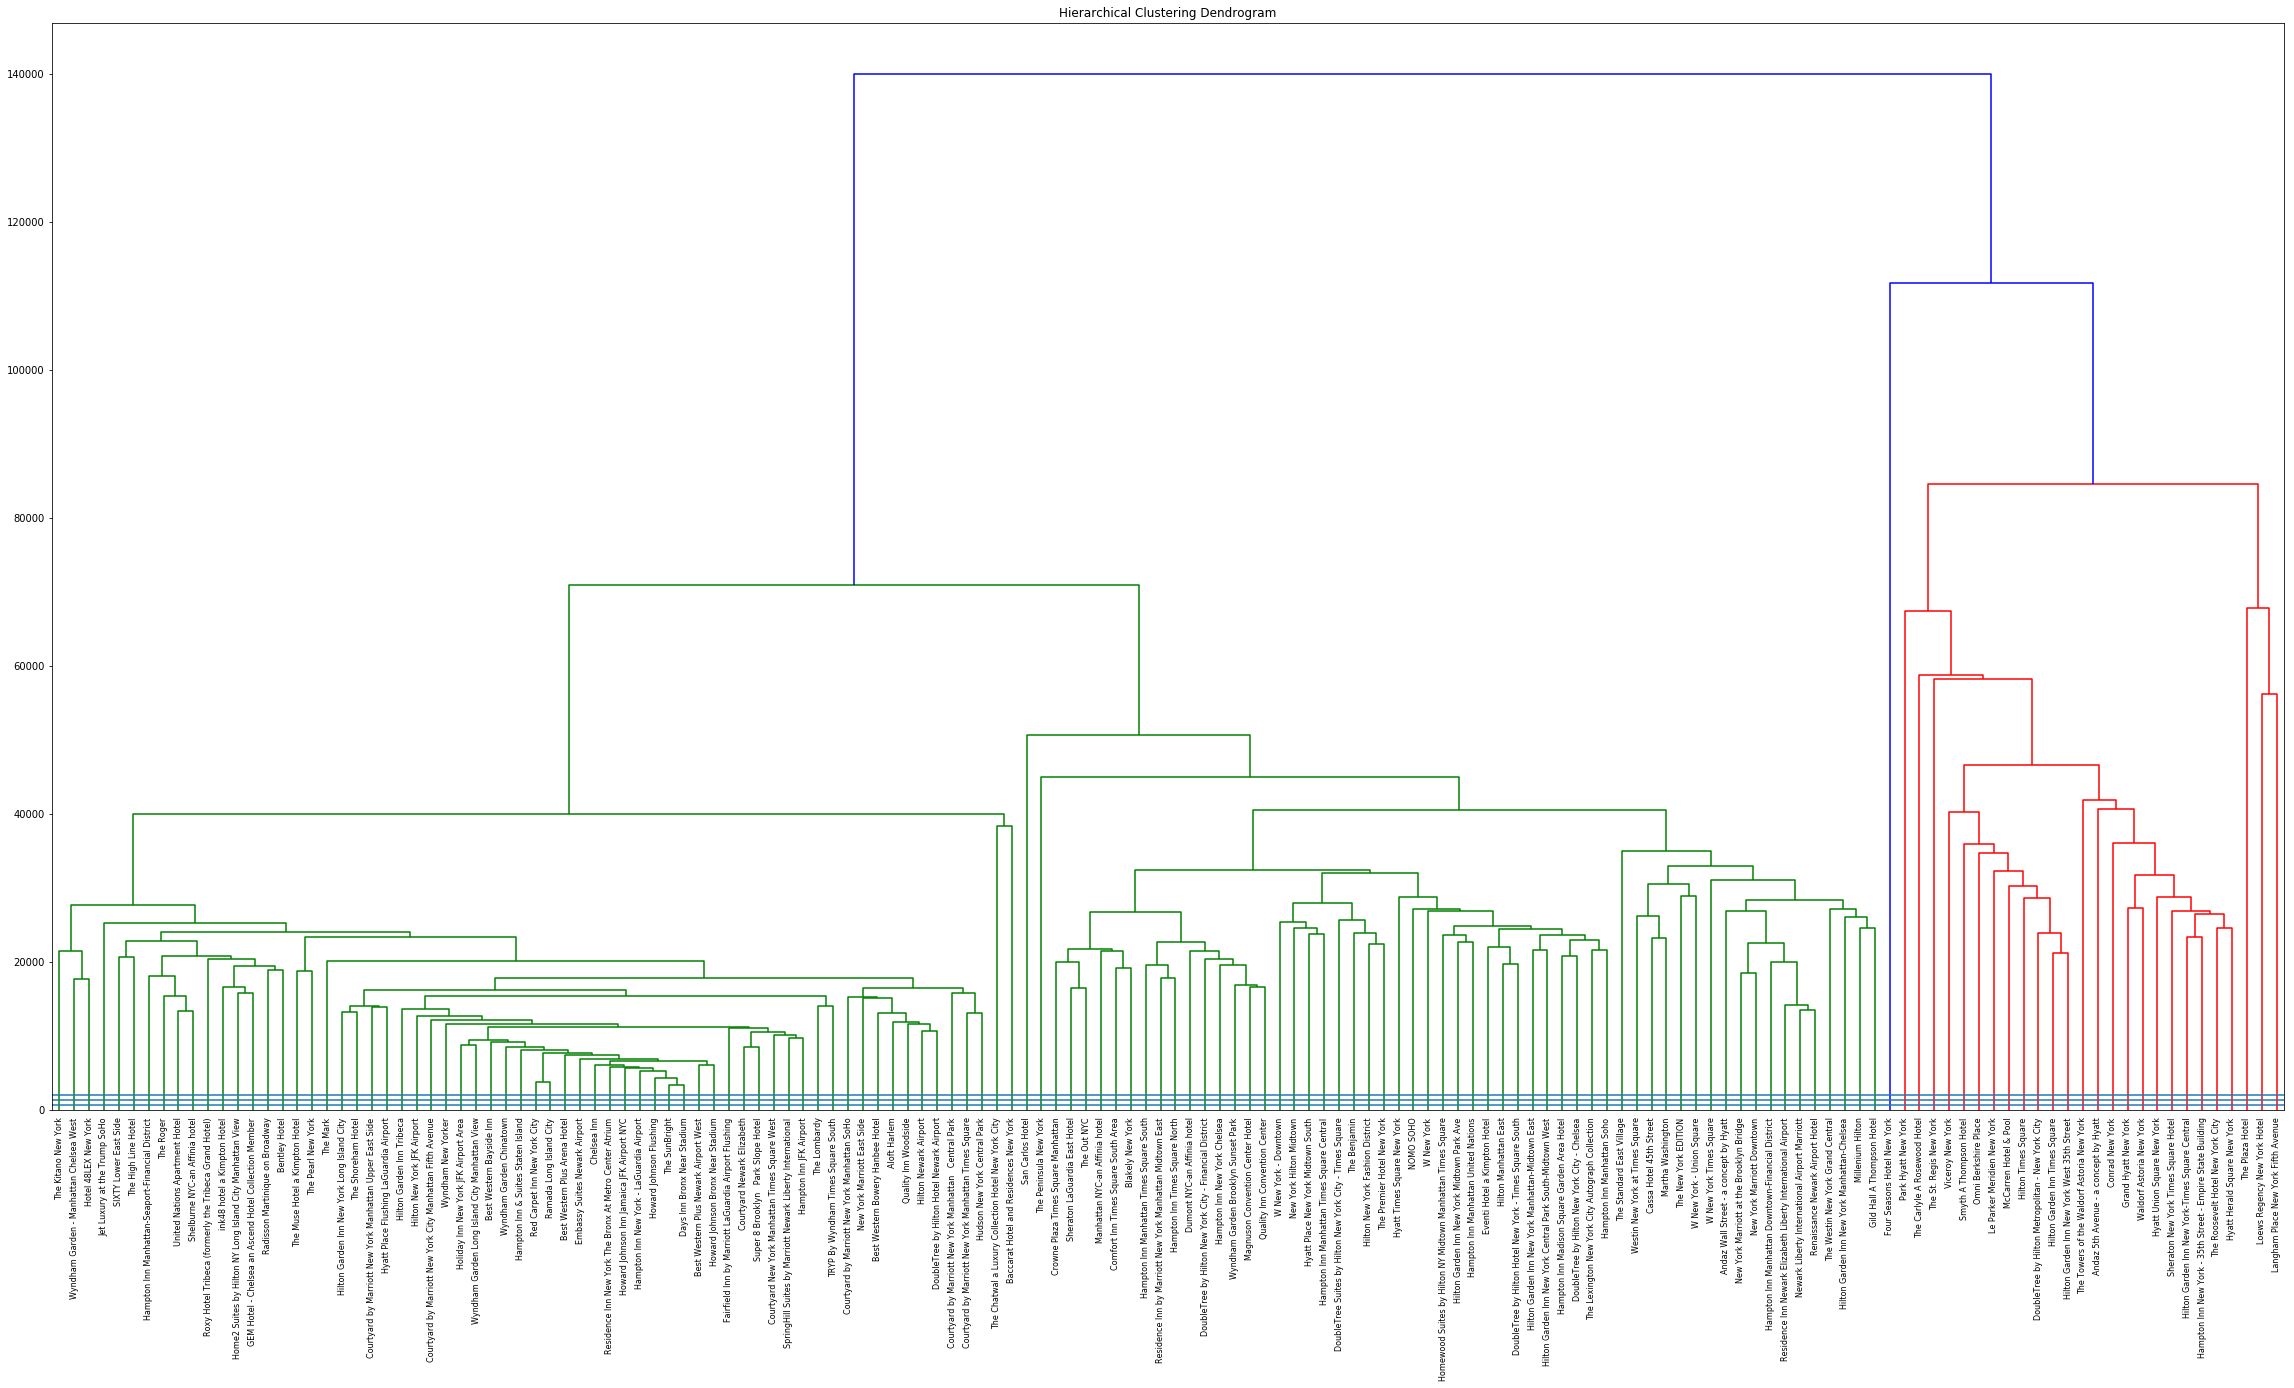

In [24]:
# Draw dendrogram
dendrogram(
    links_mat,
    labels=hotels_pp['Hotel name'].values,
    leaf_font_size=8.
)
plt.title('Hierarchical Clustering Dendrogram')
plt.axhline(y=2000)
plt.axhline(y=1300)
plt.axhline(y=700)
plt.show()